## Introduction.
### InstaBot - 1

I have added sleeptime to an extent because of slow driver and to keep up with the driver, so it may take time to load and run another task.    
There is also a copy file.  
Make sure the connection is Good :)


In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import ElementNotInteractableException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from datetime import date, datetime
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [2]:
driver = webdriver.Chrome(executable_path = r"C:\\Users\\hashi\\Downloads\\chromedriver_win32 (1)\\chromedriver.exe")  
driver.get('https://www.instagram.com/accounts/login/')
time.sleep(8)

## 1. Login To Instagram Handle
To login into the Instagram, we need to first find the Textbox where we can type username and Password in it.   
After that we need to find the submit button so that we can  click on  submit button to submit the username and password.

In [3]:
un = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.NAME,'username')))
pw = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.NAME,'password')))
un.send_keys('SAMPLE USERNAME')
pw.send_keys('SAMPLE PASSWORD')
sm = driver.find_element_by_xpath('//*[@id=\"loginForm\"]/div/div[3]/button')

sm.click()
time.sleep(3)

## Deciding if we need to save login info or not, in our case we are not saving login info.

In [4]:
try:
    not_now = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//*[@id="react-root"]/section/main/div/div/div/div/button')))
    not_now.click()
    time.sleep(12)
    not_now1 = WebDriverWait(driver, 15).until(EC.presence_of_element_located((By.XPATH,'/html/body/div[3]/div/div/div/div[3]/button[2]')))
    not_now1.click()
    
except (NoSuchElementException, TimeoutException, ElementNotInteractableException):
    pass
time.sleep(8)

## 1.1  Analysing Habits : Opening the First 10 Handles of search 'food'

In [5]:
try:
    clear = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id=\"react-root\"]/section/nav/div[2]/div/div/div[2]/div[2]')))
    clear.click()
    search_box = WebDriverWait(driver, 100).until(EC.presence_of_element_located((By.XPATH,'//*[@id=\"react-root\"]/section/nav/div[2]/div/div/div[2]/input')))
    search_box.send_keys('food')
    time.sleep(8)
    
except (NoSuchElementException, ElementNotInteractableException):
    search_box = WebDriverWait(driver, 100).until(EC.presence_of_element_located((By.XPATH,'//*[@id=\"react-root\"]/section/nav/div[2]/div/div/div[2]/input')))
    search_box.send_keys('food')
    time.sleep(8)

In [6]:
sb = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME,'fuqBx')))

In [7]:
j = 0
    
arr =[]
link = []
for i in driver.find_elements_by_xpath('//a[@class = \"-qQT3\"]/div/div[2]/div/div/div/div'):
    if i.text != '':
        arr.append(i.text)
for i in driver.find_elements_by_class_name('-qQT3'):
    i = i.get_attribute('href')
    link.append(i)

## visiting top 10 accounts and finding followers.

Now to visit the exact top 10 accounts we extracted, we need to visit it using links because when we search on search box,
we encounter a case where we have to scroll and find the particular account which is very hectic. 
So we find followers of each account and store it in the dictionary where key is (username, accountlink) in tuple and valueis 
no of followers in string.


In [8]:
d = {}
for i in range(10):
    driver.get(link[i])
    time.sleep(3)
    try:
        followers = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/span')))
    except TimeoutException:
        followers = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,  '//*[@id=\"react-root\"]/section/main/div/header/section/ul/li[2]/span/span')))
    a = followers.get_attribute('title')
    d[(arr[i], link[i])] = a
    time.sleep(3)
d   

{('yourfoodlab', 'https://www.instagram.com/yourfoodlab/'): '1,704,774',
 ('foodrush.recipe', 'https://www.instagram.com/foodrush.recipe/'): '589,299',
 ('foodie_incarnate',
  'https://www.instagram.com/foodie_incarnate/'): '416,442',
 ('food_food_surat', 'https://www.instagram.com/food_food_surat/'): '18,046',
 ('sailusfood', 'https://www.instagram.com/sailusfood/'): '73,002',
 ('food_tales__', 'https://www.instagram.com/food_tales__/'): '236',
 ('food', 'https://www.instagram.com/food/'): '124,661',
 ('food52', 'https://www.instagram.com/food52/'): '3,184,445',
 ('mumbaifoodie', 'https://www.instagram.com/mumbaifoodie/'): '498,609',
 ('pune_food_blogger',
  'https://www.instagram.com/pune_food_blogger/'): '74,821'}

In [9]:
## Here we are doing data cleaning of the account followers inside dictionary.

z = {}
for i in d:
    s = d[i][-1]
    if s.isalpha():
        if s == 'k':
            ans = float(d[i][:-1])
            ans = ans * 1000
            z[i] = ans
        elif s == 'm':
            ans = float(d[i][:-1])
            ans = ans * 1000000
            z[i] = ans
    else:
        string = d[i]
        st = string.replace(',','')
        st = float(st)
        z[i] = st
                
z

{('yourfoodlab', 'https://www.instagram.com/yourfoodlab/'): 1704774.0,
 ('foodrush.recipe', 'https://www.instagram.com/foodrush.recipe/'): 589299.0,
 ('foodie_incarnate', 'https://www.instagram.com/foodie_incarnate/'): 416442.0,
 ('food_food_surat', 'https://www.instagram.com/food_food_surat/'): 18046.0,
 ('sailusfood', 'https://www.instagram.com/sailusfood/'): 73002.0,
 ('food_tales__', 'https://www.instagram.com/food_tales__/'): 236.0,
 ('food', 'https://www.instagram.com/food/'): 124661.0,
 ('food52', 'https://www.instagram.com/food52/'): 3184445.0,
 ('mumbaifoodie', 'https://www.instagram.com/mumbaifoodie/'): 498609.0,
 ('pune_food_blogger',
  'https://www.instagram.com/pune_food_blogger/'): 74821.0}

Top 5 handles with highest number of followers: 

food52
yourfoodlab
foodrush.recipe
mumbaifoodie
foodie_incarnate
----------------------------------------------------------------


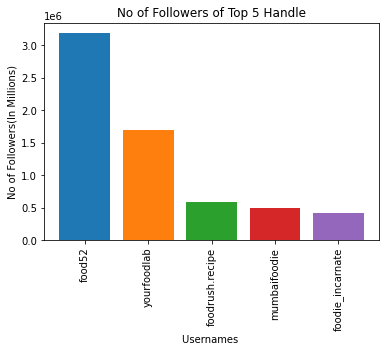

In [10]:
## Here we are Sorting the dictionary and seprating the links and followers and also finding
## the top 5 handles with most followers.

acclink = []
username = []

key = []
followers = []

for i in z:
    key.append(i)
    followers.append(z[i])
    
    
key = np.array(key)
followers = np.array(followers, dtype = np.int64)

key = key[np.argsort(followers)][::-1]
followers = followers[np.argsort(followers)][::-1]
    
j = 0
for i in key:
    acclink.append(i[1])
    username.append((i[0]))
    j+=1
    if j ==5:
        break
print('Top 5 handles with highest number of followers: ')
print()
for i in username:
    print(i)
    
print('----------------------------------------------------------------')

for i in range(5):
    plt.bar(username[i], followers[i])
    plt.xlabel('Usernames ')
    plt.ylabel('No of Followers(In Millions)')
    plt.title('No of Followers of Top 5 Handle')
    plt.xticks(rotation = 90)
plt.show()

## 1.2 No of post these handles have done in prev 3 days.

To find the post done in prev 3 days, we first finding the todays date.  
To find the time of the post, it is present in 'time' tag inside 'datetime' attribute.  
Now to find whether the post is done in 3 days or not, we use simple arithmetic calculation to find no of days between todays 
date and posts date, if it is less than 3, we count it and if it is not, we move to the next profile.  
Also Im including todays date alongside with other 3 days, if you want to count todays date as among day 1, you can change
condition to 2 where comment is ## change.  

In [12]:
## You may find this part running slow but it will work eventually.

post = {}
for i in range(len(acclink)):
    driver.get(acclink[i])
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'eLAPa'))).click()
    time.sleep(3)
    count = 0
    while True: 
        ## Using datetime module to find no of days.
        d = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, 'time'))).get_attribute('datetime')[:10]
        ## below is data cleaning.
        year = int(d[:4])
        month = int(d[5:7])
        day = int(d[8:])
        d = date(year, month, day)
        today = datetime.now()
        d1 = today.strftime("%Y-%m-%d")
        y = int(d1[:4])
        m = int(d1[5:7])
        da = int(d1[8:])
        d2 = date(y, m ,da)
        diff = d2 - d       ## Finding difference of days between todays date and posts date.
        diff = diff.days
        if diff < 3:    ## change.  ## If the post is posted within 3 days, it will increase the count and move to next post.
            count+=1
            time.sleep(3)
            try:
                b1 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '/html/body/div[5]/div[1]/div/div/a[2]')))
                b1.click()
            except (TimeoutException, NoSuchElementException):
                b2 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'/html/body/div[5]/div[1]/div/div/a')))
                b2.click()
            except TimeoutException:
                y = driver.find_element_by_xpath("//div[@class = 'QhbhU']")
                y.click()
                try:
                    b1 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '/html/body/div[5]/div[1]/div/div/a[2]')))
                    b1.click()
                except (TimeoutException, NoSuchElementException):
                    b2 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'/html/body/div[5]/div[1]/div/div/a')))
                    b2.click()
                
                
        
                
        else:
            post[username[i]] = count
            break
            
            
post      

        
            

{'food52': 9,
 'yourfoodlab': 3,
 'foodrush.recipe': 0,
 'mumbaifoodie': 7,
 'foodie_incarnate': 4}

## 1.3 Analysing Information using Graph

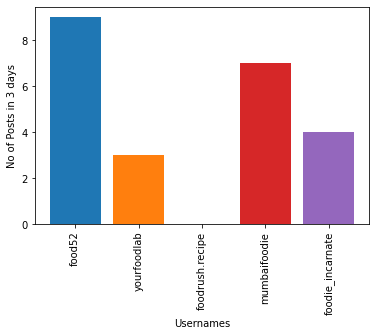

In [13]:
for i in range(5):
    plt.bar(username[i], post[username[i]])
    plt.xticks(rotation = 90)
    plt.xlabel('Usernames')
    plt.ylabel('No of Posts in 3 days')
plt.show()

## 2 Lists Of Hashtags used in Posts.

### 2.1  Opening the 5 handles and scraping the content of the first 10 posts.

Here we are scraping the contents of the post.  
Now as per our requirement, I have extracted the post with complete caption and the tags seprately(Complete caption including tags). 

In [15]:
cap = []
tags = []

for i in range(len(acclink)):
    driver.get(acclink[i])
    l = 0
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'eLAPa'))).click()

    while l != 10:   
        
        try:   ## This try catch will extract the tags in a post.
            cont = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//div[@class = 'C4VMK']/span")))
            cap.append(str(cont.text))
        except NoSuchElementException:
            pass
        
         
        try:   ## This try catch will extract whole caption.
            hashtags = driver.find_elements_by_xpath("//div[@class = 'C4VMK']/span/a")
            for i in hashtags:
                tags.append(i.get_attribute('innerHTML'))
        except NoSuchElementException:
            pass
        
        time.sleep(2)
        l +=1
        try:
            b1 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '/html/body/div[5]/div[1]/div/div/a[2]')))
            b1.click()
        except (TimeoutException, NoSuchElementException):
            b2 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'/html/body/div[5]/div[1]/div/div/a')))
            b2.click()
        except TimeoutException:
            y = driver.find_element_by_xpath("//div[@class = 'QhbhU']")
            y.click()
            try:
                b1 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '/html/body/div[5]/div[1]/div/div/a[2]')))
                b1.click()
            except (TimeoutException, NoSuchElementException):
                b2 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'/html/body/div[5]/div[1]/div/div/a')))
                b2.click()
    

    
for i in cap:
    print(i)
    print('----------------------------------------------------------')


The scenario: Coarse, spiced, seeded breadcrumbs get thrown into hot olive oil with a cracked egg on top then slid under the broiler. The result? Golden crunchy crust with gooey yolks on top! @londonbruncher whipped up a few of @christianreynoso's Crispy Eggs Fried in Bread Crumbs for herself, and you can too by heading to The link in bio. #f52community
----------------------------------------------------------
We're ending this long weekend on a sweet note! 📸: @thaliaho #f52community #f52grams
----------------------------------------------------------
Summer, in a salad: grilled, juicy peaches and apricots meet unfussy kale, with feta and prosciutto on the edge of the conversation. ☀️ Happy Memorial Day, everyone! And link in bio for the recipe. 📸: @jamesransom_nyc
----------------------------------------------------------
This double-handled skillet was born to do it all: sear, fry, simmer, and bake in the oven, too. It's got the slickest-ever surface we've seen on cast iron and an e

### 2.2 Preparing the List of all words used in the Scraped post.

In [16]:
## Here we are including emojis as well because they might have influence and some popularity among the followers.

words = {}
caps = []
for i in cap:
    caps.append(i)
for i in caps:
    j = i.split(' ')
    for k in j:
        if k in words:
            if type(k) == str:
                ## For removing space
                k = k.strip('\n')
                k.replace('\n', '')
                    
            words[k] = words.get(k, 0) + 1
        else:
            words[k] = 1
words

{'The': 8,
 'scenario:': 1,
 'Coarse,': 1,
 'spiced,': 1,
 'seeded': 1,
 'breadcrumbs': 1,
 'get': 6,
 'thrown': 1,
 'into': 6,
 'hot': 8,
 'olive': 1,
 'oil': 3,
 'with': 46,
 'a': 79,
 'cracked': 1,
 'egg': 1,
 'on': 32,
 'top': 3,
 'then': 5,
 'slid': 1,
 'under': 1,
 'the': 110,
 'broiler.': 1,
 'result?': 1,
 'Golden': 1,
 'crunchy': 1,
 'crust': 1,
 'gooey': 1,
 'yolks': 1,
 'top!': 1,
 '@londonbruncher': 1,
 'whipped': 1,
 'up': 9,
 'few': 3,
 'of': 58,
 "@christianreynoso's": 1,
 'Crispy': 2,
 'Eggs': 1,
 'Fried': 1,
 'in': 47,
 'Bread': 2,
 'Crumbs': 1,
 'for': 42,
 'herself,': 1,
 'and': 83,
 'you': 42,
 'can': 16,
 'too': 1,
 'by': 11,
 'heading': 1,
 'to': 70,
 'link': 6,
 'bio.': 2,
 '#f52community': 6,
 "We're": 1,
 'ending': 1,
 'this': 32,
 'long': 1,
 'weekend': 3,
 'sweet': 1,
 'note!': 1,
 '📸:': 7,
 '@thaliaho': 1,
 '#f52grams': 3,
 'Summer,': 1,
 'salad:': 1,
 'grilled,': 1,
 'juicy': 4,
 'peaches': 1,
 'apricots': 1,
 'meet': 1,
 'unfussy': 1,
 'kale,': 1,
 'feta':

### 2.3 Creating a CSV File

In [17]:
word = []
freq = []
for i in words:
    word.append(i)
    freq.append(words[i])

In [18]:
df = pd.DataFrame(word, columns = ['Words'])
df['Freq'] = freq
df.to_csv('words.csv')
print('csv file created')

csv file created


### 2.4 Now finding the Hashtags which were more popular among these bloggers.

In [19]:
popular = {}
for i in tags:
    if i[0] != '@':
        if i in popular:
            popular[i] = popular.get(i, 0) + 1
        else:
            popular[i] = 1


hashtags = np.array([i for i in popular.keys()])
frequency = np.array([i for i in popular.values()])

tag = hashtags[np.argsort(frequency)][::-1]
f = frequency[np.argsort(frequency)][::-1]


## Finding hashtags which are popular among these accounts

for i in range(len(tag)):
    print(tag[i],  f[i])

#foodie 19
#streetfood 15
#indianfoodbloggers 13
#foodporn 13
#food 11
#recipe 11
#indianfood 10
#foodieincarnate 10
#mumbaifoodie 9
#MumbaiFoodie 9
#foodphotography 9
#yourfoodlab 8
#sanjyotkeer 8
#indiancuisine 8
#indianfoodblogger 8
#sodelhi 7
#foodblogger 7
#streetfoodindia 7
#delhistreetfood 6
#delhi 6
#newdelhi 6
#foodtalkindia 6
#delhigram 6
#f52community 6
#recipes 6
#homemade 6
#instadaily 5
#cheese 5
#mumbaistreetfood 5
#mumbai 5
#delhifoodblogger 5
#delhifood 5
#indianfoodie 5
#delhifoodie 5
#indianstreetfood 5
#foodpornshare 4
#foodgasm 4
#recipeoftheday 4
#sandwich 4
#foodgram 4
#foodiesofinstagram 4
#mumbaiblogger 4
#bread 4
#desikhana 4
#mumbaifoodblogger 4
#mangoseason 4
#foodlover 4
#reelitfeelit 3
#reelkarofeelkaro 3
#mumbaifoodlovers 3
#instamumbai 3
#mumbaikar 3
#mumbaifoodies 3
#mumbaifoodicious 3
#munchymumbai 3
#foodiliciousmumbai 3
#foodbossindia 3
#reels 3
#things2doinmumbai 3
#foodofmumbai 3
#mumbaifood 3
#f52grams 3
#reelsinstagram 3
#foodbloggers 3
#delhifoo

### 2.5 Plotting Pie chart of top 5 hashtags.


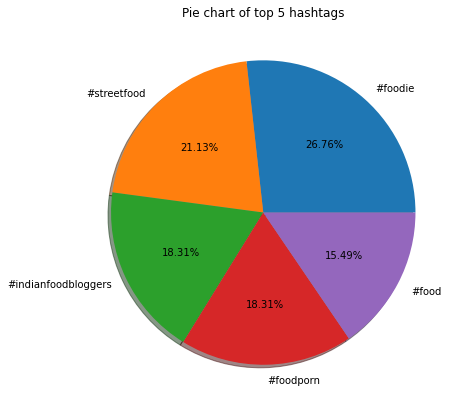

In [20]:
plt.figure(figsize=(7, 7))
plt.pie(f[:5], labels = tag[:5], autopct = '%.2f%%', shadow = True, )
plt.title('Pie chart of top 5 hashtags')
plt.show()

## 3. Calculating Average followers : likes ratio for the obtained handles.

### 3.1 Find out the likes of the top 10 posts of the 5 handles.

Now to find out likes in top 10 posts, major problem is POST CAN EITHER BE PHOTO, VIDEO, REELS, OR AN IGTV VIDEO.  
Now to find the likes on photo or more precisely, on the post which has post format 'xxxx likes' , we can find it in the class 'Nm9Fw'(This may change when instagram change the website).  
To find the likes on the Video we can find it in class 'vcOH2' where the format of the post is 'xxxx views', first we have to click on  views and then it shows the likes on post.  
Now to move on the next post after finding likes in the above format,sometimes page becomes uninteractive, so we need to click on the particular element in class 'QhbhU'. Then only the web page will become interactable.  


In [21]:
likes = []
acc = []

    
for i in range(len(acclink)):
    driver.get(acclink[i])
    like = 0
    j = 0
    
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'eLAPa'))).click()
    time.sleep(2)
    while j != 10:
        try:
            time.sleep(3)
            a = driver.find_element_by_xpath("//div[@class ='Nm9Fw']/a").text
            if a[-6:] == 'others':
                b = a[:-6]
                ## this try catch block and more like this below is for data cleaning.
                try:
                    c = int(b) + 1
                    like += c
                except ValueError:
                    d = b.replace(',','').strip()
                    e = int(d)
                    like+=e
            else:
                a = driver.find_element_by_xpath("//div[@class = 'Nm9Fw']/a/span").text
                try:
                    b = int(a)
                    like += b
                except ValueError:
                    d = a.replace(',','').strip()
                    e = int(d)
                    like+=e
                    
            
            try:
                driver.find_element_by_xpath('/html/body/div[5]/div[1]/div/div/a[2]').click()
            except NoSuchElementException:
                driver.find_element_by_xpath('/html/body/div[5]/div[1]/div/div/a').click()
            
            
            
            
        
            
        except NoSuchElementException:
            time.sleep(4)
            v = driver.find_element_by_xpath("//span[@class = 'vcOH2']")
            v.click()
            b = driver.find_element_by_xpath("//div[@class = 'vJRqr']/span")
            c = b.text
            y = driver.find_element_by_xpath("//div[@class = 'QhbhU']")
            y.click()
            try:
                d = int(c)
                like+= d
            except ValueError:
                d = c.replace(',','').strip()
                e = int(d)
                like+=e
            
            try:
                driver.find_element_by_xpath('/html/body/div[5]/div[1]/div/div/a[2]').click()
            except NoSuchElementException:
                driver.find_element_by_xpath('/html/body/div[5]/div[1]/div/div/a').click()
            
        j+=1
    likes.append(like)
    acc.append(username[i])
        



likes

[140613, 271221, 276624, 31021, 207962]

In [22]:
close = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '/html/body/div[5]/div[3]/button')))
close.click()


### 3.2 Calculating Average likes for the Handle

In [23]:
likes = np.array(likes)

avglikes= likes / 10
print(avglikes)

[14061.3 27122.1 27662.4  3102.1 20796.2]


### 3.3 Dividing the average obtained from the no of followers handle and get avg followers : like ratio  

In [24]:
follower = followers[:5]
follower
avglikes

array([14061.3, 27122.1, 27662.4,  3102.1, 20796.2])

In [25]:

avgFL = []

for i in range(5):
    avgFL.append(follower[i]/likes[i])
avgFL

[22.646874755534693,
 6.285553109825567,
 2.1303249175776506,
 16.07327294413462,
 2.0024908396726326]

### 3.4  Analysing using bargraph

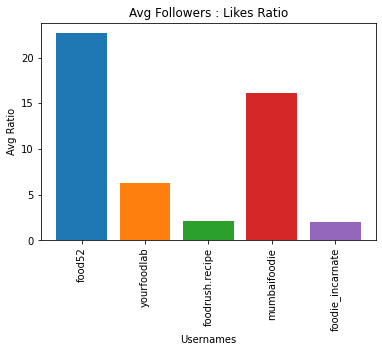

In [26]:
for i in range(len(follower)):
    plt.bar(username[i], avgFL[i])
    plt.xlabel('Usernames')
    plt.ylabel('Avg Ratio')
    plt.title('Avg Followers : Likes Ratio')
    plt.xticks(rotation = 90)
plt.show()

In [27]:
## logging out 

p = WebDriverWait(driver, 1000000).until(EC.presence_of_element_located((By.XPATH, '//*[@id="react-root"]/section/nav/div[2]/div/div/div[3]/div/div[5]/span')))
p.click()

logout = WebDriverWait(driver, 1000).until(EC.presence_of_element_located((By.XPATH, '//*[@id="react-root"]/section/nav/div[2]/div/div/div[3]/div/div[5]/div[2]/div[2]/div[2]/div[2]')))
logout.click()
print('Logged Out')

Logged Out
